In [310]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [311]:
file = r'data\train.csv'
movies_train = pd.read_csv(file)

In [312]:
file = r'data\test.csv'
movies_test = pd.read_csv(file)
movies_test.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."


In [313]:
filtered_train = movies_train.drop('revenue', axis=1)
filtered_train.tail(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de..."


In [314]:
frames = [filtered_train, movies_test]
combine = pd.concat(frames).reset_index()

In [315]:
combine.loc[len(filtered_train)-1:len(filtered_train),:]

,index,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
2999,2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de..."
3000,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."


In [316]:
print(combine.isnull().sum())

index                       0
id                          0
belongs_to_collection    5917
budget                      0
genres                     23
homepage                 5032
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
poster_path                 2
production_companies      414
production_countries      157
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
Keywords                  669
cast                       26
crew                       38
dtype: int64


In [317]:
#movies_train['genres'] = movies_train['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#movies_train['Keywords'] = movies_train['Keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#movies_train['production_companies'] = movies_train['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#movies_train['production_countries'] = movies_train['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#movies_train['spoken_languages'] = movies_train['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [318]:
movies_train.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [319]:
movies_train[movies_train['revenue'] == 0].shape

(0, 23)

In [320]:
movies_train[movies_train['revenue'].isnull()].shape

(0, 23)

In [321]:
movies_train[movies_train['budget'] == 0].shape

(812, 23)

In [322]:
movies_train['budget'] = movies_train['budget'].replace(0, np.nan)
movies_train[movies_train['budget'].isnull()].shape

(812, 23)

In [323]:
#Add a return ratio,A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.
movies_train['return'] = movies_train['revenue'] / movies_train['budget']

## Date Analysis

In [324]:
combine['year'] = pd.to_datetime(combine['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
movies_train['year'] = pd.to_datetime(movies_train['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [325]:
def clean_year(x):
    try:
        if int(x)>2019:
            return int(x)-100
        else:
            return x
    except:
        pass

In [326]:
#movies_train['year'].sort_values(ascending=False)
combine['year'] = combine['year'].apply(clean_year).astype(str)
#movies_train['year'].sort_values(ascending=False)

In [327]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [328]:
movies_train['title'] = movies_train['title'].astype('str')
movies_train['overview'] = movies_train['overview'].astype('str')

In [329]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
def get_day(x):
    try:
        year = int(str(x).split('-')[0])
        month = int(str(x).split('-')[1])
        day = str(x).split('-')[2]
        day = int(day.split()[0])
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [330]:
combine['day'] = pd.to_datetime(combine['release_date'], errors='coerce').apply(get_day)
combine['month'] = pd.to_datetime(combine['release_date'], errors='coerce').apply(get_month)

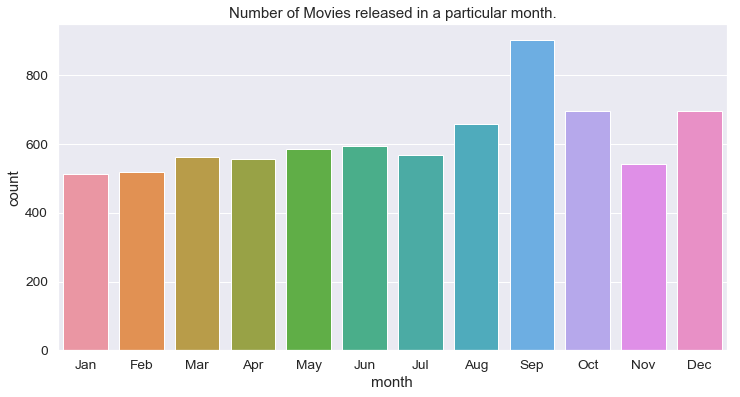

In [331]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=combine, order=month_order)

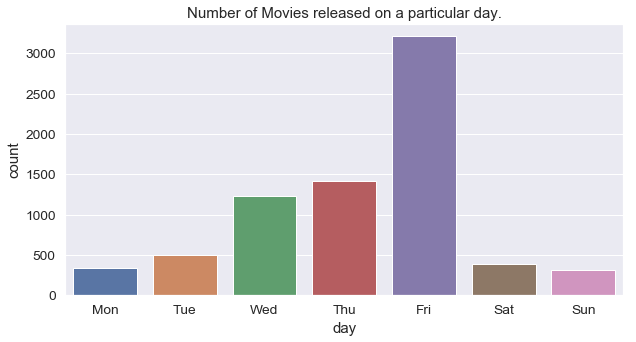

In [332]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=combine, order=day_order)

In [333]:

title_corpus = ' '.join(movies_train['title'])
overview_corpus = ' '.join(movies_train['overview'])


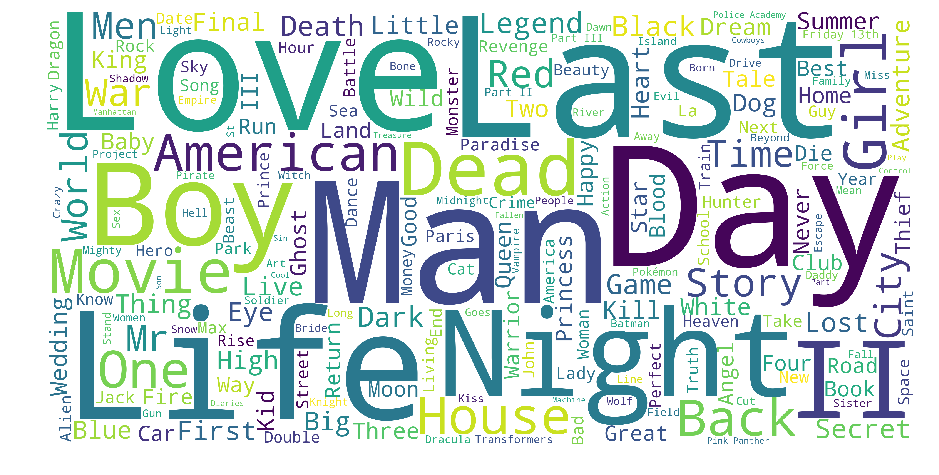

In [334]:

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


### The word Love，last, movie is the most commonly used word in movie titles. Girl, Day and Man are also among the most commonly occuring words.

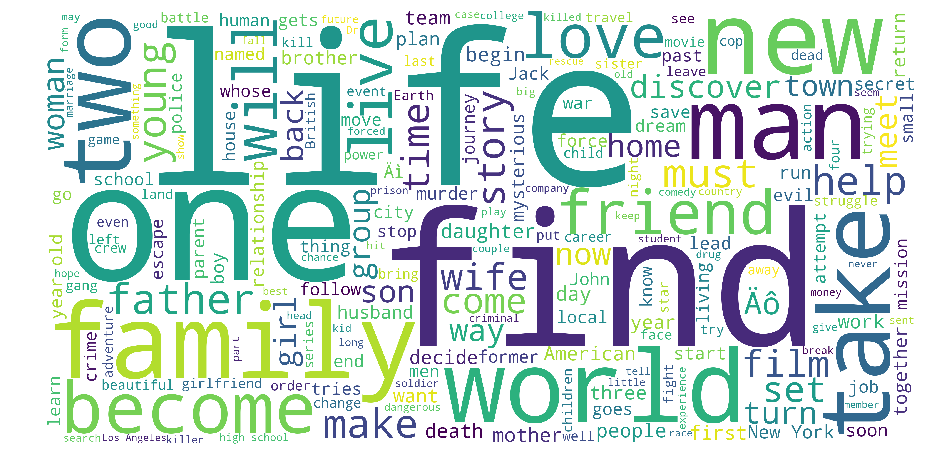

In [335]:

overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()


### Life is the most commonly used word in Movie titles. Family and Find are also popular in Movie Blurbs. Together with Love, Man and Girl, these wordclouds give us a pretty good idea of the most popular themes present in movies.

## Part 1 Revenue


 mu = 66725851.89 and sigma = 137509402.37



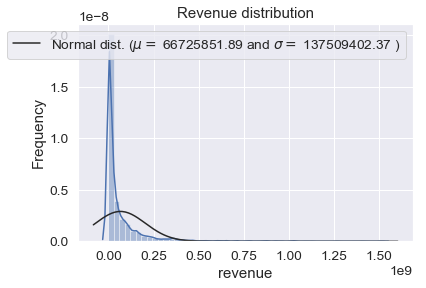

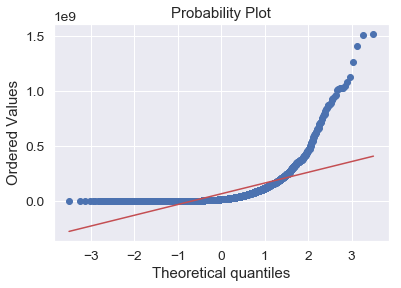

In [183]:
from scipy.stats import norm, skew
sns.distplot(movies_train['revenue'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(movies_train['revenue'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Revenue distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(movies_train['revenue'], plot=plt)
plt.show()

### The target revenue variable is right skewed. 


 mu = 134.72 and sigma = 50.47



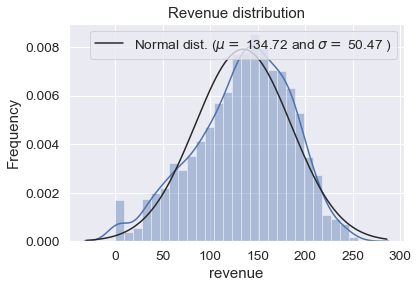

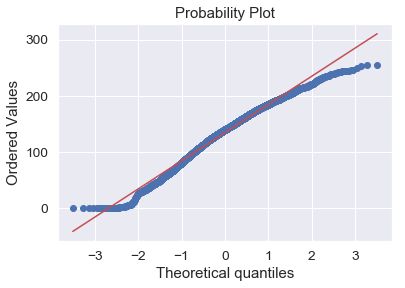

In [184]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#movies_train_1 = movies_train.copy()
movies_train['revenue'] = np.power(np.log10(movies_train['revenue']),2.5)
#movies_train_1['revenue'] = np.power(np.log10(movies_train_1['revenue']),2.5)
#Check the new distribution 
sns.distplot(movies_train['revenue'] , fit=norm);
#sns.distplot(movies_train_1['revenue'] , fit=norm);
# Get the fitted parameters used by the function
#(mu, sigma) = norm.fit(movies_train_1['revenue'])
(mu, sigma) = norm.fit(movies_train['revenue'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Revenue distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(movies_train['revenue'], plot=plt)
#res = stats.probplot(movies_train_1['revenue'], plot=plt)
plt.show()

### The skew seems now corrected and the data appears more normally distributed.

In [185]:
movies_train = movies_train.drop(columns=['id'])

## Part 2 Production Countries Analysis

In [186]:
from ast import literal_eval
combine['production_countries'] = combine['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = combine.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [187]:
con_df = combine.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,5617,United States of America
1,917,United Kingdom
2,570,France
3,411,Germany
4,323,Canada
5,220,India
6,160,Italy
7,157,Japan
8,148,Australia
9,139,Spain


In [188]:
con_df = con_df[con_df['country'] != 'United States of America']

In [189]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]
layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### Illustration： Unsurprisingly, the United States is the most popular destination of production for movies given that our dataset largely consists of English movies. Europe is also an extremely popular location with the UK, France, Germany and Italy in the top 5. Japan and India are the most popular Asian countries when it comes to movie production.

## Part 3 Franchise Movies Analysis

In [190]:
df_fran = combine[combine['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [191]:
#fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

## Part 3 Production Companies Analysis

In [192]:
combine['production_companies'] = combine['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = combine.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [193]:
com_df = movies_train.drop('production_companies', axis=1).join(s)

In [194]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [195]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,33134.052850,164.029965,202
Universal Pictures,31286.701920,166.418627,188
Paramount Pictures,26134.191491,162.324171,161
Twentieth Century Fox Film Corporation,22805.347479,165.256141,138
Columbia Pictures,15782.128087,173.429979,91
New Line Cinema,12806.946801,170.759291,75
Walt Disney Pictures,12007.157899,193.663837,62
Metro-Goldwyn-Mayer (MGM),11847.439637,141.040948,84
Touchstone Pictures,10012.927060,158.935350,63
Columbia Pictures Corporation,9173.536565,150.385845,61


### Warner Bros is the highest earning production company of all time earning a staggering 24.3 billion dollars from 200 movies. Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 20.6 billion dollars and 20 billion dollars in revenue respectively.

In [196]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Legendary Pictures,3944.631690,207.612194,19
TSG Entertainment,3220.134927,201.258433,16
Walt Disney Pictures,12007.157899,193.663837,62
Original Film,3998.486440,190.404116,21
Amblin Entertainment,4291.846920,186.602040,23
DreamWorks SKG,4964.480606,183.869652,27
Dune Entertainment,5441.753184,181.391773,30
Village Roadshow Pictures,6353.611247,176.489201,36
Relativity Media,8408.066615,175.168054,48
Fox 2000 Pictures,4347.792658,173.911706,25


### Legendary Pictures has produced the most successful movies, on average. Walt Disney Pictures with an average gross of 303 million dollars comes in second.

## Part 4 Original Language

In [197]:
movies_train['original_language'].drop_duplicates().shape[0]

36

In [198]:
lang_df = pd.DataFrame(movies_train['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,2575,en
fr,78,fr
ru,47,ru
es,43,es
hi,42,hi


### There are 36 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French come at a very distant second. Let us represent the most popular languages (apart from English) in the form of a bar plot.

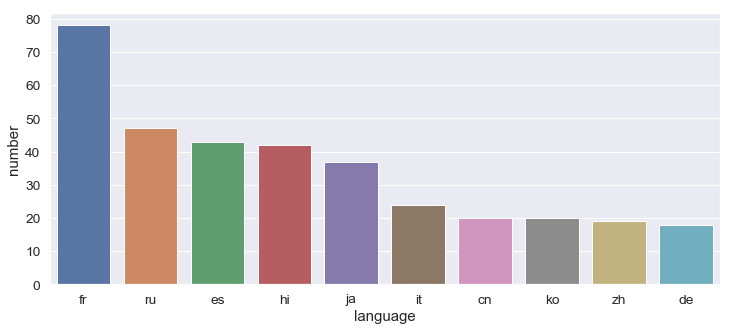

In [199]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

## Part 5 Popularity Analysis

In [200]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan


In [201]:
combine['popularity'] = combine['popularity'].apply(clean_numeric).astype('float')

In [202]:
combine['popularity'].describe()

count    7398.000000
mean        8.514968
std        12.165794
min         0.000001
25%         3.933124
50%         7.435844
75%        10.920002
max       547.488298
Name: popularity, dtype: float64

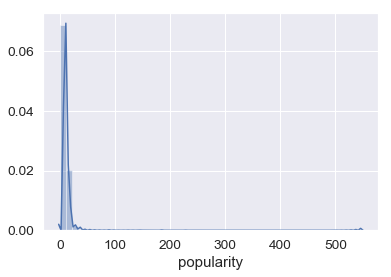

In [203]:
sns.distplot(combine['popularity'].fillna(movies_train['popularity'].median()))
plt.show()

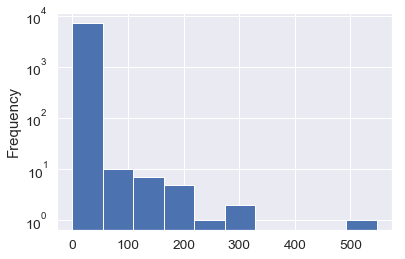

In [204]:
combine['popularity'].plot(logy=True, kind='hist')

### The Popularity score seems to be an extremely skewed quentity with a mean of only 8.5 but maximum values reaching as high as 294. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 15 (the 75th percentile is at 10.9)

In [205]:
#Most Popular Movies by Popularity Score
combine[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
6380,Minions,547.488298,2015
518,Wonder Woman,294.337037,2017
684,Beauty and the Beast,287.253654,2017
1695,Baby Driver,228.032744,2017
5977,Big Hero 6,213.849907,2014
2326,Deadpool,187.860492,2016
2126,Guardians of the Galaxy Vol. 2,185.330992,2017
6151,Avatar,185.070892,2009
4898,John Wick,183.870374,2014
1309,Gone Girl,154.801009,2014


### Wonder Woman is the most popular movie by the TMDB Popularity Score. Beauty and the Beast and Baby Driver, two movies come in second and third respectively.

## Part 6 Runtime Analysis

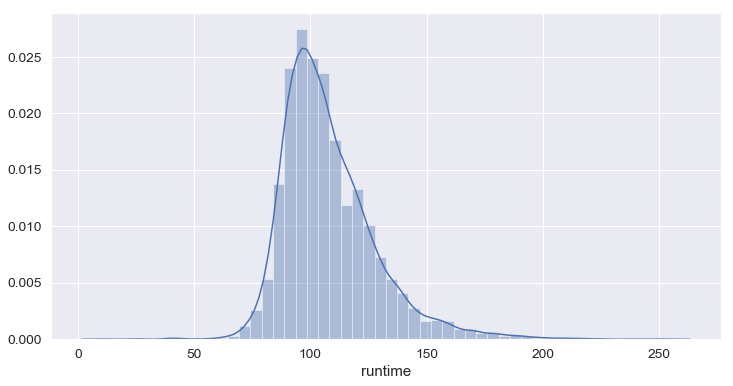

In [206]:
combine['runtime'] = combine['runtime'].astype('float')
plt.figure(figsize=(12,6))
sns.distplot(combine[(combine['runtime'] < 300) & (combine['runtime'] > 0)]['runtime'])

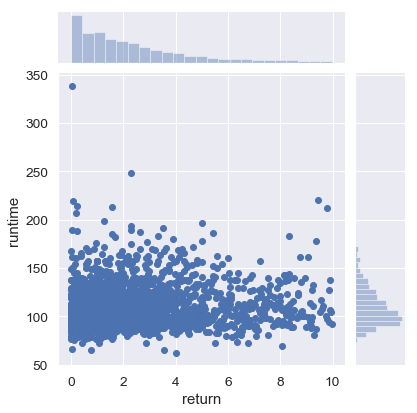

In [207]:
df_mat = movies_train[(movies_train['return'].notnull()) & (movies_train['runtime'] > 0) & (movies_train['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

In [208]:
combine['year'].sort_values(ascending=True)

1763    1921
6193    1922
5925    1923
2992    1924
7013    1925
5898    1925
1917    1925
1361    1925
6007    1925
3680    1925
2680    1926
6546    1926
2946    1927
1161    1927
3119    1927
1760    1928
187     1928
2577    1928
3875    1928
3083    1928
4548    1929
2323    1930
3213    1930
4093    1931
5237    1931
939     1931
844     1931
2032    1932
1287    1932
555     1932
        ... 
5768    2017
5933    2017
4390    2017
2749    2017
1783    2017
7313    2017
1490    2017
2729    2017
6185    2017
568     2017
6732    2017
1442    2017
4245    2017
577     2017
5631    2017
5630    2017
1630    2017
314     2017
4787    2017
5266    2017
2962    2017
5966    2017
6756    2017
6060    2017
7164    2017
2623    2017
2624    2017
3794    2017
5307    2018
3828    None
Name: year, Length: 7398, dtype: object

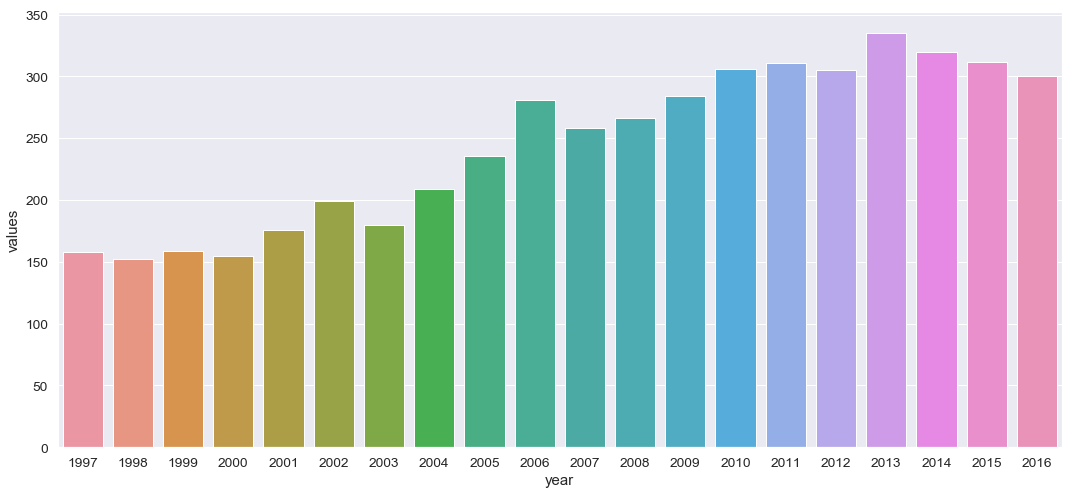

In [209]:
year_df = combine.groupby('year').size().sort_values(ascending=False).head(20)
year_df = pd.DataFrame(data={'year': year_df.index, 'values':year_df.values})
plt.figure(figsize=(18,8))
sns.barplot(x = 'year',y = 'values',data=year_df)
plt.show()
#year_df.values

### There seems to be relationship between the two quantities. The duration of a movie is independent of its success.

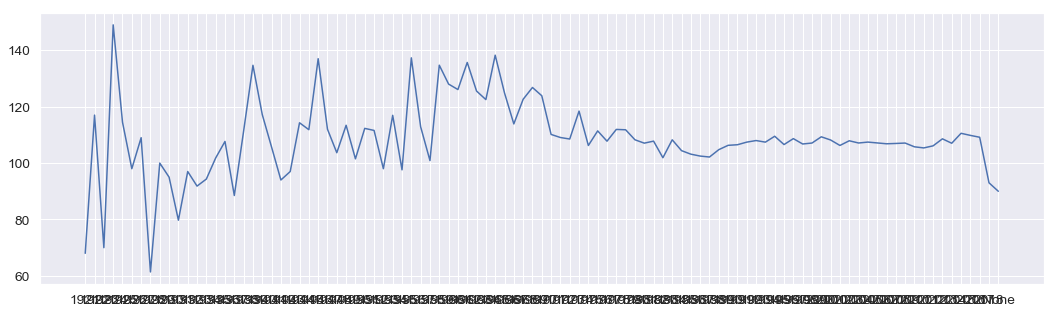

In [210]:
plt.figure(figsize=(18,5))
year_runtime = combine[combine['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
#plt.xticks(np.arange(1969, 2014, 10.0))
plt.show()

In [211]:
#shortest movies
combine[combine['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
2577,11.0,"The Life and Death of 9413, a Hollywood Extra",1928
5279,25.0,Winnie the Pooh and a Day for Eeyore,1983
4266,26.0,Mickey's Christmas Carol,1983
6923,38.0,Haunted Castle,2001
775,40.0,Born to Be Wild,2011
7085,40.0,Wolves,1999
1020,40.0,The Living Sea,1995
5707,42.0,Dr. Horrible's Sing-Along Blog,2008
6241,44.0,Everest,1998
5602,46.0,Michael Jordan to the Max,2000


### We see that "The Life and Death of 9413, a Hollywood Extra" is the shortest movie, which is 11 minutes

In [212]:
#longest movies
combine[combine['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
1211,338.0,Carlos,2010
5710,320.0,Gangs of Wasseypur,2012
4185,254.0,Gettysburg,1993
1922,248.0,Cleopatra,1963
6335,238.0,Gone with the Wind,1939
7381,225.0,Woodstock,1970
5065,224.0,Lagaan: Once Upon a Time in India,2001
523,220.0,The Ten Commandments,1956
1302,219.0,Heaven's Gate,1980
7253,216.0,Lawrence of Arabia,1962


### We see that "Carlos" is the longest movie, which is 338 minutes

## Part 7 Budget Analysis

In [213]:
(combine['budget'].notnull() == True).sum()

7398

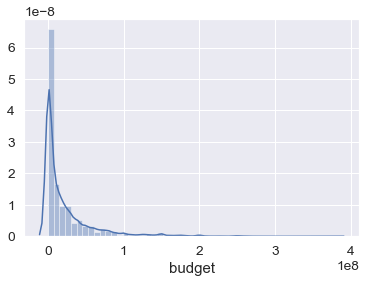

In [214]:
sns.distplot(combine[combine['budget'].notnull()]['budget'])

In [215]:
#Top ten expensive movies 
movies_train[movies_train['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
2135,Pirates of the Caribbean: On Stranger Tides,380000000.0,244.312487,2.751878,2011
2209,Pirates of the Caribbean: At World's End,300000000.0,241.835507,3.203333,2007
2770,Avengers: Age of Ultron,280000000.0,253.099788,5.019299,2015
1425,Superman Returns,270000000.0,216.406052,1.448449,2006
1630,Transformers: The Last Knight,260000000.0,228.532622,2.326701,2017
1270,John Carter,260000000.0,207.775997,1.092843,2012
961,Harry Potter and the Half-Blood Prince,250000000.0,241.002083,3.735837,2009
2532,The Hobbit: An Unexpected Journey,250000000.0,243.612674,4.084414,2012
906,The Dark Knight Rises,250000000.0,245.396918,4.339756,2012
666,The Hobbit: The Desolation of Smaug,250000000.0,241.756324,3.833600,2013


### Illustration : Pirates of the Caribbean films occupy the top spots in this list with a staggering budget of over 300 million dollars. All the top 10 most expensive films made a profit on their investment.

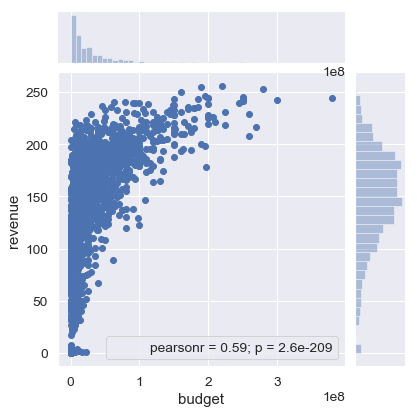

In [216]:
#correlation of budget and revenue
j = sns.jointplot(x='budget',y='revenue',data=movies_train[movies_train['return'].notnull()])
j.annotate(stats.pearsonr)
plt.show()

### The pearson r value of 0.75 between the two quantities indicates a very strong correlation.

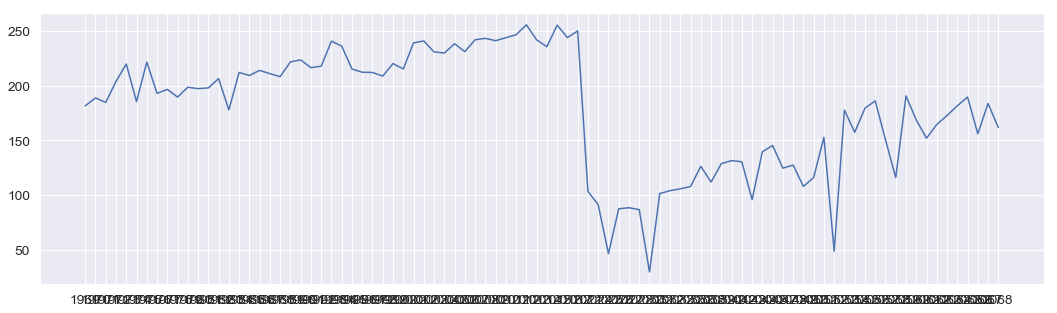

In [217]:
### plot the maximum revenue through the years.
plt.figure(figsize=(18,5))
year_revenue = movies_train[(movies_train['revenue'].notnull())].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
#plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

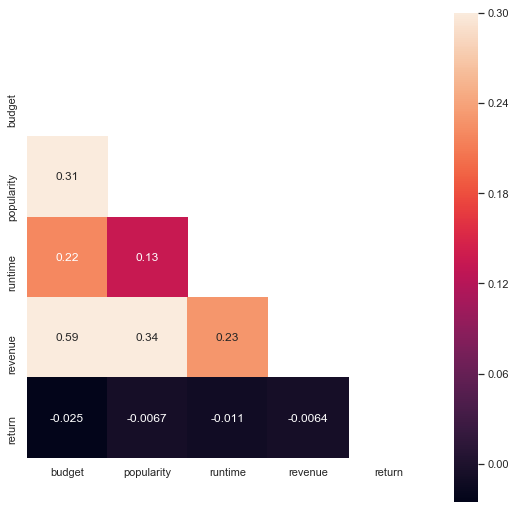

In [218]:
# constructure correlation matrix.
sns.set(font_scale=1)
corr = movies_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

## Part 8 Genres

In [219]:
combine['genres'] = combine['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [220]:
combine['genres']

0                                             [Comedy]
1                     [Comedy, Drama, Family, Romance]
2                                              [Drama]
3                                    [Thriller, Drama]
4                                   [Action, Thriller]
5                       [Animation, Adventure, Family]
6                                   [Horror, Thriller]
7                                        [Documentary]
8           [Action, Comedy, Music, Family, Adventure]
9                                      [Comedy, Music]
10                                             [Drama]
11                                            [Comedy]
12                                             [Drama]
13                                     [Comedy, Crime]
14        [Action, Thriller, Science Fiction, Mystery]
15                              [Action, Crime, Drama]
16                                  [Horror, Thriller]
17                                    [Drama, Romance]
18        

In [221]:
movies_train['genres'] = movies_train['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [222]:
#combine1 = combine.copy()
#s1 = combine1.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
#s1

In [223]:
s = movies_train.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [224]:
gen_df = movies_train.drop('genres', axis=1).join(s)
gen_df['genre'].value_counts().shape[0]

20

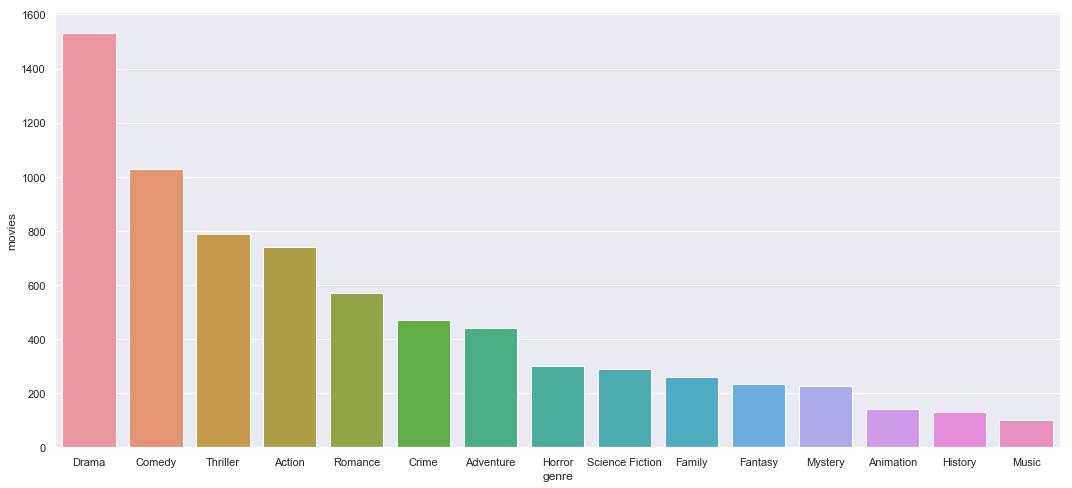

In [225]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

### Drama is the most commonly occurring genre with almost half the movies identifying itself as a drama film. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

In [226]:
box_genres = gen_df['genre'].value_counts().sort_values(ascending=False).head(10).index.tolist()

In [227]:
box_movies = gen_df[(gen_df['genre'].isin(box_genres))]

In [228]:
box_movies

,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,status,tagline,title,Keywords,cast,crew,revenue,return,year,genre
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.0,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",133.869064,0.879618,2015,Comedy
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",179.800279,2.378736,2004,Comedy
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",179.800279,2.378736,2004,Drama
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",179.800279,2.378736,2004,Family
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",179.800279,2.378736,2004,Romance
2,NaN,3300000.0,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",135.127372,3.967273,2014,Drama
3,NaN,1200000.0,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",139.300393,13.333333,2012,Thriller
3,NaN,1200000.0,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,Released,NaN,Kahaani,"[{'id': 10092, 'name'

<Figure size 1296x576 with 0 Axes>

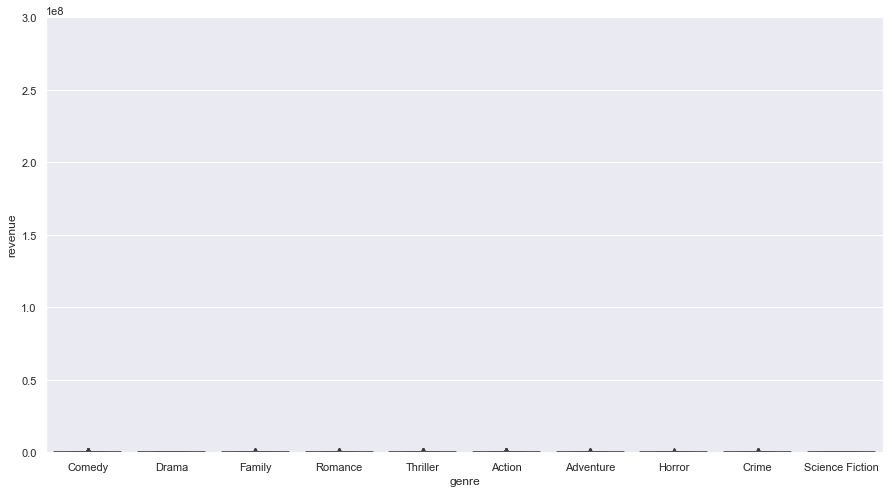

In [229]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=box_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

### Adventure movies has the largest 25-75 range as well as the median revenue among all the genres plotted. Fimily and Action and Science Fiction have the second and third and forth highest median revenue respectively.

## Part 9 Cast and Crew

In [230]:
combine['cast'] = combine['cast'].fillna('[]').apply(literal_eval)
combine['cast'] = combine['cast'].apply(lambda x: [i['name'] for i in x[0:2]] if isinstance(x, list) else [])
#movies_train['cast'] = movies_train['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [231]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan
combine['crew'] = combine['crew'].fillna('[]').apply(literal_eval)
combine['director'] = combine['crew'].apply(get_director)

In [232]:
#movies_train['cast']

## Prediction 

In [233]:
s = combine.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_rgf = combine.drop('genres', axis=1).join(s)
genres_train = gen_rgf['genre'].drop_duplicates()

In [234]:
#genres_train

In [235]:
s = combine.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'production_countries'
gen_rgf = combine.drop('production_countries', axis=1).join(s)
countries_train = gen_rgf['production_countries'].drop_duplicates()
#gen_rgf['production_countries']

In [236]:
#countries_train

In [237]:
s = combine.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = combine.drop('cast', axis=1).join(s)
cast_train = cast_df['actor'].drop_duplicates()

In [238]:
#cast_train

In [239]:
combine['Keywords'] = combine['Keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = combine.apply(lambda x: pd.Series(x['Keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Keywords'
gen_rgf = combine.drop('Keywords', axis=1).join(s)
keywords_train = gen_rgf['Keywords'].drop_duplicates()

In [240]:
#keywords_train

In [241]:
combine['belongs_to_collection'] = combine['belongs_to_collection'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = combine.apply(lambda x: pd.Series(x['belongs_to_collection']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'belongs_to_collection'
gen_rgf = combine.drop('belongs_to_collection', axis=1).join(s)
collection_train = gen_rgf['belongs_to_collection'].drop_duplicates()
#collection_train

In [242]:
def feature_engineering(df):
    for collection in collection_train:
        df['is_' + str(collection)] = df['belongs_to_collection'].apply(lambda x: 1 if collection in x else 0)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['num_keywords'] = df['Keywords'].apply(lambda x: len(x))
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    for country in countries_train:
        df['is_' + str(country)] = df['production_countries'].apply(lambda x: 1 if country in x else 0)
    for cast in cast_train:
        df['is_' + str(cast)] = df['cast'].apply(lambda x: 1 if cast in x else 0)
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    
    
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df = df.drop(['id', 'genres', 'homepage','imdb_id','original_title', 'overview', 'poster_path', 'release_date','day','month', 'year','spoken_languages','status', 'tagline', 'title','original_language','Keywords','crew', 'cast','belongs_to_collection','production_countries'], axis=1)
    df = pd.get_dummies(df, prefix='is')
    return df

In [243]:
combineX = feature_engineering(combine)


In [244]:
combineX.head()

,index,budget,popularity,production_companies,runtime,is_Hot Tub Time Machine Collection,is_The Princess Diaries Collection,is_nan,is_The Muppet Collection,is_Rocky Collection,...,is_–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ó–µ–ª—å–¥–æ–≤–∏—á,is_–í–µ—Ä–∞ –ö—Ä–∏—á–µ–≤—Å–∫–∞—è,is_√Älex Pastor,is_√Ålex de la Iglesia,is_√Ålvaro S√°enz de Heredia,is_√áaƒüan Irmak,is_√âdouard Molinaro,is_√âmile Gaudreault,is_√âva G√°rdos,is_√ñmer Vargƒ±
0,0,14000000,6.575393,3,93.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,40000000,8.248895,1,113.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3300000,64.299990,3,105.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200000,3.174936,0,122.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1.148070,0,118.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
import sklearn.preprocessing as skp
combineX_norm = combineX.copy()
combineX_norm.ix[:,:4] = skp.scale(combineX_norm.ix[:,:4].astype(np.float))
combineX_norm.head(3)

,index,budget,popularity,production_companies,runtime,is_Hot Tub Time Machine Collection,is_The Princess Diaries Collection,is_nan,is_The Muppet Collection,is_Rocky Collection,...,is_–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ó–µ–ª—å–¥–æ–≤–∏—á,is_–í–µ—Ä–∞ –ö—Ä–∏—á–µ–≤—Å–∫–∞—è,is_√Älex Pastor,is_√Ålex de la Iglesia,is_√Ålvaro S√°enz de Heredia,is_√áaƒüan Irmak,is_√âdouard Molinaro,is_√âmile Gaudreault,is_√âva G√°rdos,is_√ñmer Vargƒ±
0,-1.630103,-0.232811,-0.159439,0.116834,93.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.629252,0.470916,-0.021872,-0.797807,113.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.628400,-0.522421,4.585709,0.116834,105.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
combineX_norm.drop('index',inplace=True, axis=1)
combineX_norm.head(3)

,budget,popularity,production_companies,runtime,is_Hot Tub Time Machine Collection,is_The Princess Diaries Collection,is_nan,is_The Muppet Collection,is_Rocky Collection,is_Revenge of the Nerds Collection,...,is_–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ó–µ–ª—å–¥–æ–≤–∏—á,is_–í–µ—Ä–∞ –ö—Ä–∏—á–µ–≤—Å–∫–∞—è,is_√Älex Pastor,is_√Ålex de la Iglesia,is_√Ålvaro S√°enz de Heredia,is_√áaƒüan Irmak,is_√âdouard Molinaro,is_√âmile Gaudreault,is_√âva G√°rdos,is_√ñmer Vargƒ±
0,-0.232811,-0.159439,0.116834,93.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.470916,-0.021872,-0.797807,113.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.522421,4.585709,0.116834,105.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
combineX_norm = pd.get_dummies(combineX_norm, prefix='is')

In [248]:
trainX = combineX_norm.loc[:len(filtered_train)-1,:]
trainy = movies_train['revenue']

In [249]:
#get score from train
train_X, test_X, train_y, test_y = train_test_split(trainX, trainy, train_size=0.75, test_size=0.25)
reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
y_pred = reg.predict(test_X)
reg.score(test_X, test_y)

0.577911756768794

In [250]:
#trainX.budget = trainX.budget.divide(100000)
#trainX = trainX.drop(['budget'],axis = 1)

In [251]:
#train_X, test_X, train_y, test_y = train_test_split(trainX, trainy, train_size=0.75, test_size=0.25)

In [252]:
test_X = combineX_norm.loc[len(filtered_train):,:]

In [253]:
#reg = GradientBoostingRegressor()
#reg.fit(trainX, trainy)

In [254]:
y_pred = reg.predict(test_X)
#np.power(np.log10(movies_train['revenue']),2.5)
y_pred = pow(10,pow(y_pred, 1/2.5))
#pd.Series(range(1, len(df) + 1))

# Multiple Logistic Regression

In [255]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [256]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X.values)
    #y = pow(10,pow(train_y, 1/2.5))
    rmse= np.sqrt(-cross_val_score(model, train_X.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [257]:
#Lasso Regression Model
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [296]:
#Lasso Proformance
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
lasso_mean = score.mean()
lasso_std = score.std()


Lasso score: 42.7687 (1.3680)



In [297]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
ENet_mean = score.mean()
ENet_std = score.std()

ElasticNet score: 38.6261 (1.0609)



In [298]:
#Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
KRR_mean = score.mean()
KRR_std = score.std()

Kernel Ridge score: 38.5453 (1.2685)



In [299]:
#Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
GBoost_mean = score.mean()
GBoost_std = score.std()

Gradient Boosting score: 32.9864 (1.0113)



In [302]:
#XGBoost :

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
xgb_mean = score.mean()
xgb_std = score.std()

Xgboost score: 33.6163 (0.6342)



In [303]:
#LightGBM :

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
lgb_mean = score.mean()
lgb_std = score.std()

LGBM score: 32.6555 (0.7266)



In [264]:
#Stacking approach : By Averaging base models
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X,y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [305]:
#average models
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
averaged_mean = score.mean()
averaged_std = score.std()

 Averaged base models score: 35.2326 (1.1448)



In [266]:
#Stacking averaged Models Class
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
       # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [268]:

stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

#score = rmsle_cv(stacked_averaged_models)
#print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


In [269]:
"""
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
clf1 = ENet
clf2 = GBoost
clf3 = KRR
lr = lasso
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['ENet', 
                       'GBoost', 
                       'KRR',
                       'lasso']):

    scores = model_selection.cross_val_score(clf, train_X, train_y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
"""

'\nfrom mlxtend.classifier import StackingClassifier\nfrom sklearn import model_selection\nclf1 = ENet\nclf2 = GBoost\nclf3 = KRR\nlr = lasso\nsclf = StackingClassifier(classifiers=[clf1, clf2, clf3],\n                          use_probas=True,\n                          average_probas=False,\n                          meta_classifier=lr)\n\nprint(\'3-fold cross validation:\n\')\n\nfor clf, label in zip([clf1, clf2, clf3, sclf], \n                      [\'ENet\', \n                       \'GBoost\', \n                       \'KRR\',\n                       \'lasso\']):\n\n    scores = model_selection.cross_val_score(clf, train_X, train_y, \n                                              cv=3, scoring=\'accuracy\')\n    print("Accuracy: %0.2f (+/- %0.2f) [%s]" \n          % (scores.mean(), scores.std(), label))\n'

In [270]:
train_y.values.max()

255.45228226862721

In [271]:
train_X.isnull().sum().sum()

0

In [272]:
train_X.max().max()

338.0

In [273]:
train_X.min().min()

-1.2551266564303662

In [274]:
#rmsle evaluation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [275]:
#model = AveragingModels()
averaged_models.fit(train_X, train_y)
averaged_train_pred = averaged_models.predict(train_X.values)
averaged_pred = pow(10,pow(averaged_models.predict(test_X.values), 1/2.5))
#averaged_pred = np.expm1(averaged_models.predict(test_X.values))
print(rmsle(train_y, averaged_train_pred))

17.50719407045461


In [284]:
#model = StackingModels()
"""
stacked_averaged_models.fit(train_X.values, train_y)
stacked_train_pred = stacked_averaged_models.predict(train_X.values)
stacked_pred = pow(10,pow(stacked_averaged_models.predict(test_X.values), 1/2.5))
print(rmsle(train_y, stacked_train_pred))
"""

'\nstacked_averaged_models.fit(train_X.values, train_y)\nstacked_train_pred = stacked_averaged_models.predict(train_X.values)\nstacked_pred = pow(10,pow(stacked_averaged_models.predict(test_X.values), 1/2.5))\nprint(rmsle(train_y, stacked_train_pred))\n'

In [277]:
#xgboost
model_xgb.fit(train_X.values, train_y)
xgb_train_pred = model_xgb.predict(train_X.values)
xgb_pred = pow(10,pow(model_xgb.predict(test_X.values), 1/2.5))
print(rmsle(train_y, lgb_train_pred))

64.4319875977472


In [278]:
#Lightgbm
model_lgb.fit(train_X, train_y)
lgb_train_pred = model_lgb.predict(train_X.values)
lgb_pred = pow(10,pow(model_lgb.predict(test_X.values), 1/2.5))
print(rmsle(train_y, lgb_train_pred))


28.194681682149845


In [289]:
#d_df = pd.DataFrame()
#d_df['Id'] = result.id
#d_df['revenue'] = averaged_pred
d = {'revenue': pd.Series(lasso_pred)}
df = pd.DataFrame(data=d)
#d_df.set_index('Id', inplace=True)
df.to_csv('result.csv',index = False)

In [281]:
averaged_pred.max()

14879128517.599085

In [282]:
#train_X.dtypes
#train_X.convert_objects(convert_numeric=True)
#train_X.dtypes

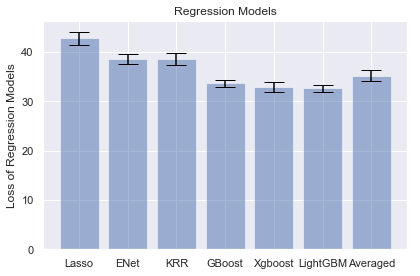

In [309]:
#erro comparision 
import numpy as np
import matplotlib.pyplot as plt

# Create lists for the plot
models = ['Lasso', 'ENet', 'KRR','GBoost','Xgboost','LightGBM','Averaged']
x_pos = np.arange(len(models))
CTEs = [lasso_mean, ENet_mean, KRR_mean,xgb_mean,GBoost_mean,lgb_mean,averaged_mean]
error = [lasso_std, ENet_std, KRR_std,xgb_std,GBoost_std,lgb_std,averaged_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Loss of Regression Models')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.set_title('Regression Models')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()